In [1]:
import numpy as np
from utils import momento

In [2]:
import os
import pandas as pd 

data_path = os.path.join('.','datos','datosmasas.csv')

dt = pd.read_csv(data_path, index_col=0)
dt.head()

,masas,x,y,z
particula,,,,
1,2.0,-53.0,79.0,-91.0
2,2.0,13.0,-142.0,-177.0
3,2.0,-109.0,-103.0,-120.0
4,2.0,4.0,-96.0,110.0
5,4.0,222.0,-22.0,-236.0


In [3]:
import matplotlib.pyplot as plt 

masas = np.array(dt['masas'])
masas = masas[:, None]

x = np.array(dt['x'])
y = np.array(dt['y'])

print(x.shape)


(1533,)


In [4]:
_input = np.stack([x,y], 1)

momento0 = momento( masas, _input, n=0)
momento1 = momento( masas, _input, n=1)
momento2 = momento( masas, _input, n=2)

In [5]:
print("Momento 0  - Masa total del sistema")
print(momento0)

Momento 0  - Masa total del sistema
[[4627.]]


In [6]:
momento1[1]

array([4850.6347032])

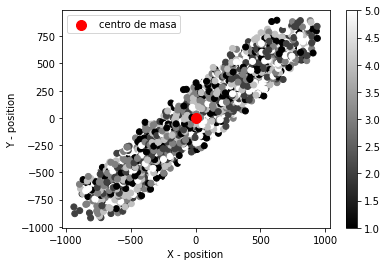

In [7]:


x_center = x - np.mean(x)
y_center = y - np.mean(y)


normalize_center = momento1/momento0
cmasa_x , cmasa_y = normalize_center[0] , normalize_center[1]


sc = plt.scatter(x_center, y_center, c=masas, cmap='gray')
plt.xlabel("X - position")
plt.ylabel("Y - position")
plt.scatter(cmasa_x, cmasa_y, s=100, c='red', label='centro de masa')
plt.legend()
plt.colorbar(sc)




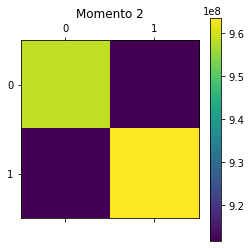

In [8]:
plt.matshow(momento2 )
plt.title("Momento 2")
plt.colorbar()
plt.show()

In [18]:
vectori = np.array([1, 0])[:, None]
vectorj = np.array([0, 1])[:, None]

base = [vectori, vectorj]


In [23]:
A = []

for vi in base:
    row = []
    for vj in base:
        _lambda  = vi.T @ ( momento2 @ vj )
        row.append(row)

    A.append(row)

A = np.array(A)

In [ ]:
A.shape

[[[...], [...]], [[...], [...]]]